In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [14]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)
    plt.show()

In [10]:
def load_embedding(file_path):
    with open(file_path, "r") as file:
        row, col = map(int, file.readline().strip().split())
        print(row, col)
        dataset = np.zeros((row, col))
        words = []
        for i, line in enumerate(file, start=0):
            v = line.strip().split()
            if len(v) != (col+1):
                print(line)
                break
            words.append(v[0])
            x = [float(item) for item in v[1:]]
            dataset[i] = np.array(x)
    return dataset, words
            
dataset, words = load_embedding("./vec.txt")
print(dataset.shape)

16972 100
(16972, 100)


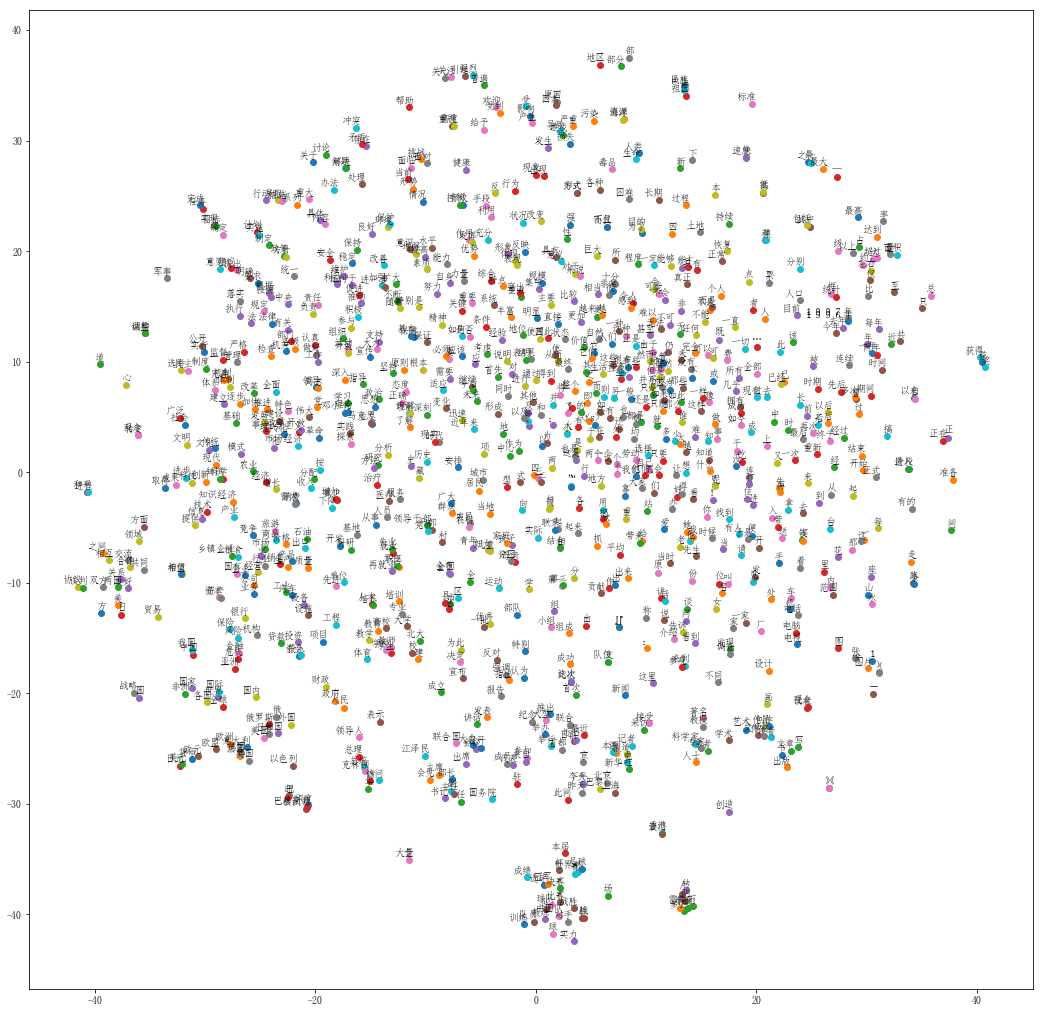

In [16]:
from sklearn.manifold import TSNE
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 1000
low_dim_embs = tsne.fit_transform(dataset[:plot_only,:])
labels = [words[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)